In [5]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('results.csv')



# Printing the sample head
print(data.head())

   id    name      input compiler  threads      real       usr       sys  \
0   1  ferret     simdev      gcc        1  0m0.023s  0m0.030s  0m0.005s   
1   2  ferret   simsmall      gcc        1  0m0.395s  0m0.343s  0m0.017s   
2   3  ferret  simmedium      gcc        1  0m1.470s  0m1.345s  0m0.052s   
3   4  ferret   simlarge      gcc        1  0m6.867s  0m6.535s  0m0.145s   
4   5  ferret     native      gcc        1  6m50.895  6m40.672  0m1.619s   

   cores  
0      1  
1      1  
2      1  
3      1  
4      1  


In [22]:
# Converting execution time to milliseconds

def convertExecutionTime(time):
    MIN_TO_MIL_SECONDS = 60000
    SECONDS_TO_MIL_SECONDS = 1000
    min,seconds = time.split('m')
    seconds = seconds.replace('s','')
    min = int(min) 
    seconds = float(seconds)
    fullTimeinMilliseconds = int(min * MIN_TO_MIL_SECONDS + seconds * SECONDS_TO_MIL_SECONDS) 
    return fullTimeinMilliseconds

data['real'] = data['real'].apply(convertExecutionTime)
data['usr'] = data['usr'].apply(convertExecutionTime)
data['sys'] = data['sys'].apply(convertExecutionTime)



In [23]:
print(data.describe())

                id      threads           real            usr           sys  \
count  3855.000000  3855.000000    3855.000000    3855.000000   3855.000000   
mean   1928.000000    10.463035   38554.242542   44830.111284   1485.290013   
std    1112.986972    10.824693   88747.774795  112770.703391   4259.727504   
min       1.000000     1.000000       4.000000       0.000000      1.000000   
25%     964.500000     2.000000     260.500000     227.000000     18.000000   
50%    1928.000000     4.000000    1122.000000    1185.000000     45.000000   
75%    2891.500000    16.000000    9116.000000    7515.500000    747.500000   
max    3855.000000    32.000000  420039.000000  413117.000000  28688.000000   

             cores  
count  3855.000000  
mean     16.439689  
std       9.266701  
min       1.000000  
25%       8.000000  
50%      16.000000  
75%      24.000000  
max      32.000000  


In [24]:
# plt.scatter(x,y, c='b', marker='x', label='1')
# plt.scatter(x, y, c='r', marker='s', label='-1')
# plt.legend(loc='upper left')
# plt.show()

data.loc[data['name'] == "ferret"]

,id,name,input,compiler,threads,real,usr,sys,cores
0,1,ferret,simdev,gcc,1,23,30,5,1
1,2,ferret,simsmall,gcc,1,395,343,17,1
2,3,ferret,simmedium,gcc,1,1470,1345,52,1
3,4,ferret,simlarge,gcc,1,6867,6535,145,1
4,5,ferret,native,gcc,1,410895,400672,1619,1
...,...,...,...,...,...,...,...,...,...
1920,1921,ferret,simdev,gcc-tbb,32,22,28,6,32
1921,1922,ferret,simsmall,gcc-tbb,32,267,342,18,32
1922,1923,ferret,simmedium,gcc-tbb,32,729,1176,38,32
1923,1924,ferret,simlarge,gcc-tbb,32,2968,5888,91,32


In [25]:
# Plottting charts for gcc-compiler based implementations

c1data = data.loc[data['compiler'] == "gcc"]
c1data


,id,name,input,compiler,threads,real,usr,sys,cores
0,1,ferret,simdev,gcc,1,23,30,5,1
1,2,ferret,simsmall,gcc,1,395,343,17,1
2,3,ferret,simmedium,gcc,1,1470,1345,52,1
3,4,ferret,simlarge,gcc,1,6867,6535,145,1
4,5,ferret,native,gcc,1,410895,400672,1619,1
1925,1926,dedup,simdev,gcc,1,115,63,35,1
1926,1927,dedup,simsmall,gcc,1,754,396,331,1
1927,1928,dedup,simmedium,gcc,1,2341,1287,963,1
1928,1929,dedup,simlarge,gcc,1,14553,8258,6102,1
1929,1930,dedup,native,gcc,1,47432,26080,21023,1


array(['simdev', 'simsmall', 'simmedium', 'simlarge', 'native'],
      dtype=object)

<Figure size 432x288 with 0 Axes>

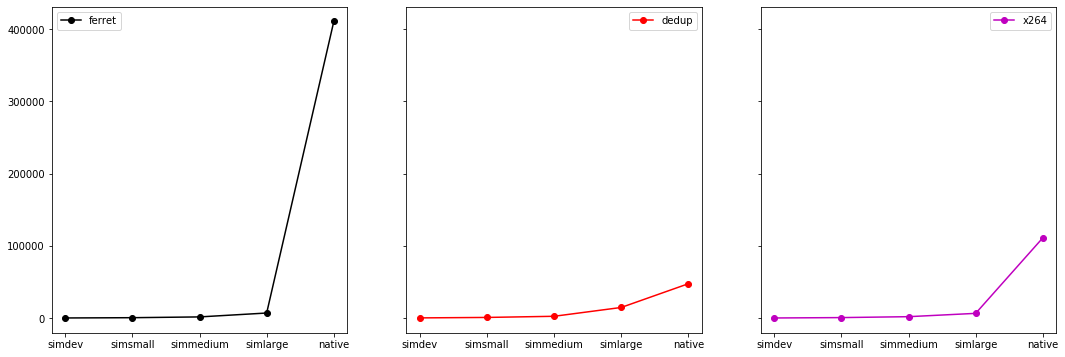

In [56]:
fig=plt.figure() #Creates a new figure
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)


line1 = axs[0].plot(c1data['input'].unique(),(c1data.loc[data['name'] == "ferret"])['real'],'ko-',label='ferret') #no need for str(x_axis)
line2 = axs[1].plot(c1data['input'].unique(),(c1data.loc[data['name'] == "dedup"])['real'],'ro-',label='dedup') 
line3 = axs[2].plot(c1data['input'].unique(),(c1data.loc[data['name'] == "x264"])['real'],'mo-',label='x264') 
axs[0].legend()
axs[1].legend()
axs[2].legend()

c1data['input'].unique()
